In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/movielens-100k-dataset/ml-100k/u.occupation
/kaggle/input/movielens-100k-dataset/ml-100k/u1.base
/kaggle/input/movielens-100k-dataset/ml-100k/u.info
/kaggle/input/movielens-100k-dataset/ml-100k/u4.test
/kaggle/input/movielens-100k-dataset/ml-100k/u.item
/kaggle/input/movielens-100k-dataset/ml-100k/README
/kaggle/input/movielens-100k-dataset/ml-100k/u1.test
/kaggle/input/movielens-100k-dataset/ml-100k/ua.test
/kaggle/input/movielens-100k-dataset/ml-100k/u.data
/kaggle/input/movielens-100k-dataset/ml-100k/u5.test
/kaggle/input/movielens-100k-dataset/ml-100k/mku.sh
/kaggle/input/movielens-100k-dataset/ml-100k/u5.base
/kaggle/input/movielens-100k-dataset/ml-100k/u.user
/kaggle/input/movielens-100k-dataset/ml-100k/ub.base
/kaggle/input/movielens-100k-dataset/ml-100k/u4.base
/kaggle/input/movielens-100k-dataset/ml-100k/u2.test
/kaggle/input/movielens-100k-dataset/ml-100k/ua.base
/kaggle/input/movielens-100k-dataset/ml-100k/u3.test
/kaggle/input/movielens-100k-dataset/ml-100k/u.

In [2]:
filmes = pd.read_csv('/kaggle/input/movielens-100k-dataset/ml-100k/u.item', sep = '|', encoding = 'latin-1', header = None, index_col = False)
filmes.head()

,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
0,1,Toy Story (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Toy%20Story%2...,0,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0
1,2,GoldenEye (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?GoldenEye%20(...,0,1,1,0,0,...,0,0,0,0,0,0,0,1,0,0
2,3,Four Rooms (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Four%20Rooms%...,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,4,Get Shorty (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Get%20Shorty%...,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,5,Copycat (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Copycat%20(1995),0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


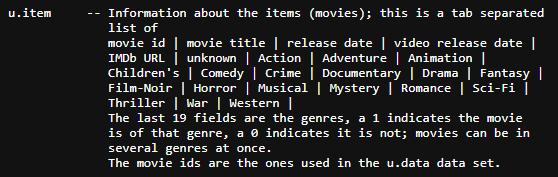

In [3]:
filmes.columns = ['movie_id', 'movie_title', 'release_date', 'video_release_date', 'IMDb_URL', 'unknown',
                 'Action', 'Adventure', 'Animation', 'Children', 'Comedy', 'Crime', 'Documentary', 
                 'Drama', 'Fantasy', 'FilmNoir', 'Horror', 'Musical', 'Mystery', 'Romance', 'SciFi', 
                 'Thriller', 'War', 'Western']
filmes.head()

,movie_id,movie_title,release_date,video_release_date,IMDb_URL,unknown,Action,Adventure,Animation,Children,...,Fantasy,FilmNoir,Horror,Musical,Mystery,Romance,SciFi,Thriller,War,Western
0,1,Toy Story (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Toy%20Story%2...,0,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0
1,2,GoldenEye (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?GoldenEye%20(...,0,1,1,0,0,...,0,0,0,0,0,0,0,1,0,0
2,3,Four Rooms (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Four%20Rooms%...,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,4,Get Shorty (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Get%20Shorty%...,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,5,Copycat (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Copycat%20(1995),0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [4]:
filmes.shape

(1682, 24)

In [5]:
filmes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1682 entries, 0 to 1681
Data columns (total 24 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   movie_id            1682 non-null   int64  
 1   movie_title         1682 non-null   object 
 2   release_date        1681 non-null   object 
 3   video_release_date  0 non-null      float64
 4   IMDb_URL            1679 non-null   object 
 5   unknown             1682 non-null   int64  
 6   Action              1682 non-null   int64  
 7   Adventure           1682 non-null   int64  
 8   Animation           1682 non-null   int64  
 9   Children            1682 non-null   int64  
 10  Comedy              1682 non-null   int64  
 11  Crime               1682 non-null   int64  
 12  Documentary         1682 non-null   int64  
 13  Drama               1682 non-null   int64  
 14  Fantasy             1682 non-null   int64  
 15  FilmNoir            1682 non-null   int64  
 16  Horror

In [6]:
filmes.video_release_date.unique()

array([nan])

In [7]:
filmes.drop(columns = ['video_release_date'], inplace = True)
filmes.head()

,movie_id,movie_title,release_date,IMDb_URL,unknown,Action,Adventure,Animation,Children,Comedy,...,Fantasy,FilmNoir,Horror,Musical,Mystery,Romance,SciFi,Thriller,War,Western
0,1,Toy Story (1995),01-Jan-1995,http://us.imdb.com/M/title-exact?Toy%20Story%2...,0,0,0,1,1,1,...,0,0,0,0,0,0,0,0,0,0
1,2,GoldenEye (1995),01-Jan-1995,http://us.imdb.com/M/title-exact?GoldenEye%20(...,0,1,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,3,Four Rooms (1995),01-Jan-1995,http://us.imdb.com/M/title-exact?Four%20Rooms%...,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,4,Get Shorty (1995),01-Jan-1995,http://us.imdb.com/M/title-exact?Get%20Shorty%...,0,1,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,5,Copycat (1995),01-Jan-1995,http://us.imdb.com/M/title-exact?Copycat%20(1995),0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


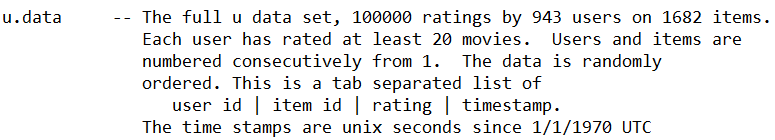

In [8]:
notas = pd.read_csv('/kaggle/input/movielens-100k-dataset/ml-100k/u.data', encoding = 'latin-1', sep = "\t", header = None, index_col = False)
notas.columns = ['user_id', 'item_id', 'rating', 'timestamp']
notas.head()

,user_id,item_id,rating,timestamp
0,196,242,3,881250949
1,186,302,3,891717742
2,22,377,1,878887116
3,244,51,2,880606923
4,166,346,1,886397596


In [9]:
notas.shape

(100000, 4)

In [10]:
notas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype
---  ------     --------------   -----
 0   user_id    100000 non-null  int64
 1   item_id    100000 non-null  int64
 2   rating     100000 non-null  int64
 3   timestamp  100000 non-null  int64
dtypes: int64(4)
memory usage: 3.1 MB


In [11]:
notas.describe()

,user_id,item_id,rating,timestamp
count,100000.00000,100000.000000,100000.000000,1.000000e+05
mean,462.48475,425.530130,3.529860,8.835289e+08
std,266.61442,330.798356,1.125674,5.343856e+06
min,1.00000,1.000000,1.000000,8.747247e+08
25%,254.00000,175.000000,3.000000,8.794487e+08
50%,447.00000,322.000000,4.000000,8.828269e+08
75%,682.00000,631.000000,4.000000,8.882600e+08
max,943.00000,1682.000000,5.000000,8.932866e+08


In [12]:
# Escolhendo o ID dos filmes como index
filmes = filmes.set_index('movie_id')

# Selecionando um filme através do seu ID (escolhendo pelo horário que estou digitando esta linha)
filmes.loc[1143]

movie_title                              Hard Eight (1996)
release_date                                   28-Feb-1997
IMDb_URL        http://us.imdb.com/Title?Hard+Eight+(1996)
unknown                                                  0
Action                                                   0
Adventure                                                0
Animation                                                0
Children                                                 0
Comedy                                                   0
Crime                                                    1
Documentary                                              0
Drama                                                    0
Fantasy                                                  0
FilmNoir                                                 0
Horror                                                   0
Musical                                                  0
Mystery                                                 

# Verificando o total de votos de cada filme:

In [13]:
total_de_votos = notas['item_id'].value_counts()
total_de_votos.head()

50     583
258    509
100    508
181    507
294    485
Name: item_id, dtype: int64

In [14]:
filmes['Total_de_votos'] = total_de_votos
filmes.head()

,movie_title,release_date,IMDb_URL,unknown,Action,Adventure,Animation,Children,Comedy,Crime,...,FilmNoir,Horror,Musical,Mystery,Romance,SciFi,Thriller,War,Western,Total_de_votos
movie_id,,,,,,,,,,,,,,,,,,,,,
1,Toy Story (1995),01-Jan-1995,http://us.imdb.com/M/title-exact?Toy%20Story%2...,0,0,0,1,1,1,0,...,0,0,0,0,0,0,0,0,0,452
2,GoldenEye (1995),01-Jan-1995,http://us.imdb.com/M/title-exact?GoldenEye%20(...,0,1,1,0,0,0,0,...,0,0,0,0,0,0,1,0,0,131
3,Four Rooms (1995),01-Jan-1995,http://us.imdb.com/M/title-exact?Four%20Rooms%...,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,90
4,Get Shorty (1995),01-Jan-1995,http://us.imdb.com/M/title-exact?Get%20Shorty%...,0,1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,209
5,Copycat (1995),01-Jan-1995,http://us.imdb.com/M/title-exact?Copycat%20(1995),0,0,0,0,0,0,1,...,0,0,0,0,0,0,1,0,0,86


In [15]:
filmes.sort_values('Total_de_votos', ascending = False)

,movie_title,release_date,IMDb_URL,unknown,Action,Adventure,Animation,Children,Comedy,Crime,...,FilmNoir,Horror,Musical,Mystery,Romance,SciFi,Thriller,War,Western,Total_de_votos
movie_id,,,,,,,,,,,,,,,,,,,,,
50,Star Wars (1977),01-Jan-1977,http://us.imdb.com/M/title-exact?Star%20Wars%2...,0,1,1,0,0,0,0,...,0,0,0,0,1,1,0,1,0,583
258,Contact (1997),11-Jul-1997,http://us.imdb.com/Title?Contact+(1997/I),0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,509
100,Fargo (1996),14-Feb-1997,http://us.imdb.com/M/title-exact?Fargo%20(1996),0,0,0,0,0,0,1,...,0,0,0,0,0,0,1,0,0,508
181,Return of the Jedi (1983),14-Mar-1997,http://us.imdb.com/M/title-exact?Return%20of%2...,0,1,1,0,0,0,0,...,0,0,0,0,1,1,0,1,0,507
294,Liar Liar (1997),21-Mar-1997,http://us.imdb.com/Title?Liar+Liar+(1997),0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,485
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1576,"Hungarian Fairy Tale, A (1987)",01-Jan-1987,"http://us.imdb.com/M/title-exact?Hol%20volt,%2...",0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1577,"Death in the Garden (Mort en ce jardin, La) (1...",01-Jan-1956,"http://us.imdb.com/Title?Mort+en+ce+jardin,+La...",0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1348,Every Other Weekend (1990),01-Jan-1990,http://us.imdb.com/Title?Un+week-end+sur+deux+...,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


# Verificando a nota média dos filmes:

In [16]:
notas_medias = notas.groupby("item_id").mean()['rating']
notas_medias.head()

item_id
1    3.878319
2    3.206107
3    3.033333
4    3.550239
5    3.302326
Name: rating, dtype: float64

In [17]:
filmes['nota_media'] = notas_medias
filmes.head()

,movie_title,release_date,IMDb_URL,unknown,Action,Adventure,Animation,Children,Comedy,Crime,...,Horror,Musical,Mystery,Romance,SciFi,Thriller,War,Western,Total_de_votos,nota_media
movie_id,,,,,,,,,,,,,,,,,,,,,
1,Toy Story (1995),01-Jan-1995,http://us.imdb.com/M/title-exact?Toy%20Story%2...,0,0,0,1,1,1,0,...,0,0,0,0,0,0,0,0,452,3.878319
2,GoldenEye (1995),01-Jan-1995,http://us.imdb.com/M/title-exact?GoldenEye%20(...,0,1,1,0,0,0,0,...,0,0,0,0,0,1,0,0,131,3.206107
3,Four Rooms (1995),01-Jan-1995,http://us.imdb.com/M/title-exact?Four%20Rooms%...,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,90,3.033333
4,Get Shorty (1995),01-Jan-1995,http://us.imdb.com/M/title-exact?Get%20Shorty%...,0,1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,209,3.550239
5,Copycat (1995),01-Jan-1995,http://us.imdb.com/M/title-exact?Copycat%20(1995),0,0,0,0,0,0,1,...,0,0,0,0,0,1,0,0,86,3.302326


In [18]:
filmes.sort_values("nota_media", ascending = False).head(15)

,movie_title,release_date,IMDb_URL,unknown,Action,Adventure,Animation,Children,Comedy,Crime,...,Horror,Musical,Mystery,Romance,SciFi,Thriller,War,Western,Total_de_votos,nota_media
movie_id,,,,,,,,,,,,,,,,,,,,,
814,"Great Day in Harlem, A (1994)",01-Jan-1994,http://us.imdb.com/M/title-exact?Great%20Day%2...,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,5.000
1599,Someone Else's America (1995),10-May-1996,http://us.imdb.com/M/title-exact?Someone%20Els...,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,5.000
1201,Marlene Dietrich: Shadow and Light (1996),02-Apr-1996,http://us.imdb.com/M/title-exact?Marlene%20Die...,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,5.000
1122,They Made Me a Criminal (1939),01-Jan-1939,http://us.imdb.com/M/title-exact?They%20Made%2...,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,1,5.000
1653,Entertaining Angels: The Dorothy Day Story (1996),27-Sep-1996,http://us.imdb.com/M/title-exact?Entertaining%...,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,5.000
1293,Star Kid (1997),16-Jan-1998,http://us.imdb.com/M/title-exact?imdb-title-12...,0,0,1,0,1,0,0,...,0,0,0,0,1,0,0,0,3,5.000
1500,Santa with Muscles (1996),08-Nov-1996,http://us.imdb.com/M/title-exact?Santa%20with%...,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,2,5.000
1189,Prefontaine (1997),24-Jan-1997,http://us.imdb.com/M/title-exact?Prefontaine%2...,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,3,5.000
1536,Aiqing wansui (1994),22-Jul-1996,http://us.imdb.com/M/title-exact?Aiqing%20Wans...,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,5.000


In [19]:
filmes.query('Total_de_votos >= 10').sort_values('nota_media', ascending = False)

,movie_title,release_date,IMDb_URL,unknown,Action,Adventure,Animation,Children,Comedy,Crime,...,Horror,Musical,Mystery,Romance,SciFi,Thriller,War,Western,Total_de_votos,nota_media
movie_id,,,,,,,,,,,,,,,,,,,,,
408,"Close Shave, A (1995)",28-Apr-1996,http://us.imdb.com/M/title-exact?Close%20Shave...,0,0,0,1,0,1,0,...,0,0,0,0,0,1,0,0,112,4.491071
318,Schindler's List (1993),01-Jan-1993,http://us.imdb.com/M/title-exact?Schindler's%2...,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,298,4.466443
169,"Wrong Trousers, The (1993)",01-Jan-1993,http://us.imdb.com/M/title-exact?Wrong%20Trous...,0,0,0,1,0,1,0,...,0,0,0,0,0,0,0,0,118,4.466102
483,Casablanca (1942),01-Jan-1942,http://us.imdb.com/M/title-exact?Casablanca%20...,0,0,0,0,0,0,0,...,0,0,0,1,0,0,1,0,243,4.456790
114,Wallace & Gromit: The Best of Aardman Animatio...,05-Apr-1996,http://us.imdb.com/Title?Wallace+%26+Gromit%3A...,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,67,4.447761
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
758,Lawnmower Man 2: Beyond Cyberspace (1996),01-Jan-1996,http://us.imdb.com/M/title-exact?Lawnmower%20M...,0,0,0,0,0,0,0,...,0,0,0,0,1,1,0,0,21,1.714286
1087,Bloodsport 2 (1995),01-Mar-1996,http://us.imdb.com/M/title-exact?Bloodsport%20...,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,10,1.700000
440,Amityville II: The Possession (1982),01-Jan-1982,http://us.imdb.com/M/title-exact?Amityville%20...,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,14,1.642857


Fazer a recomendação somente pela média das notas não é uma boa saída, porque filmes desconhecidos podem receber poucas avaliações que o classificam melhor do que os outros e isso faz com que a nota não represente de forma adequada sua avaliação.

In [20]:
filmes.Total_de_votos.min()

1

In [21]:
filmes.Total_de_votos.max()

583

Sabendo o valor mínimo e máximo que os filmes receberam, decidi trabalhar somente com aqueles que tiveram no mínimo 50 avaliações.

In [22]:
filmes_com_mais_de_50_votos = filmes.query('Total_de_votos >= 50')
filmes_com_mais_de_50_votos.sort_values('nota_media', ascending = False)

,movie_title,release_date,IMDb_URL,unknown,Action,Adventure,Animation,Children,Comedy,Crime,...,Horror,Musical,Mystery,Romance,SciFi,Thriller,War,Western,Total_de_votos,nota_media
movie_id,,,,,,,,,,,,,,,,,,,,,
408,"Close Shave, A (1995)",28-Apr-1996,http://us.imdb.com/M/title-exact?Close%20Shave...,0,0,0,1,0,1,0,...,0,0,0,0,0,1,0,0,112,4.491071
318,Schindler's List (1993),01-Jan-1993,http://us.imdb.com/M/title-exact?Schindler's%2...,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,298,4.466443
169,"Wrong Trousers, The (1993)",01-Jan-1993,http://us.imdb.com/M/title-exact?Wrong%20Trous...,0,0,0,1,0,1,0,...,0,0,0,0,0,0,0,0,118,4.466102
483,Casablanca (1942),01-Jan-1942,http://us.imdb.com/M/title-exact?Casablanca%20...,0,0,0,0,0,0,0,...,0,0,0,1,0,0,1,0,243,4.456790
114,Wallace & Gromit: The Best of Aardman Animatio...,05-Apr-1996,http://us.imdb.com/Title?Wallace+%26+Gromit%3A...,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,67,4.447761
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
122,"Cable Guy, The (1996)",14-Jun-1996,"http://us.imdb.com/M/title-exact?Cable%20Guy,%...",0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,106,2.339623
988,"Beautician and the Beast, The (1997)",07-Feb-1997,http://us.imdb.com/M/title-exact?Beautician%20...,0,0,0,0,0,1,0,...,0,0,0,1,0,0,0,0,86,2.313953
120,Striptease (1996),28-Jun-1996,http://us.imdb.com/M/title-exact?Striptease%20...,0,0,0,0,0,1,1,...,0,0,0,0,0,0,0,0,67,2.238806


# Fazendo um sistema de recomendação utilizando os gêneros dos filmes:

Digamos que, eu tenha assistido os seguintes filmes:

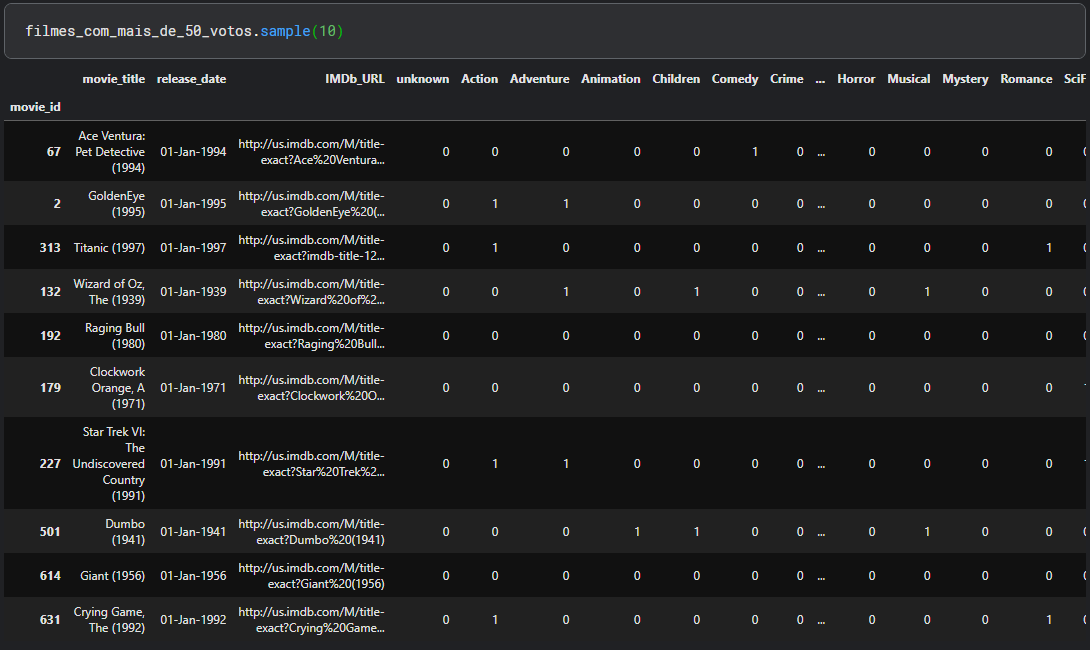

E quero assistir um filme de ação e drama.

In [23]:
assistido = [67, 2, 313, 132, 192, 179, 227, 501, 614, 631]
filmes_com_mais_de_50_votos.query('Action == 1 and Drama == 1')

,movie_title,release_date,IMDb_URL,unknown,Action,Adventure,Animation,Children,Comedy,Crime,...,Horror,Musical,Mystery,Romance,SciFi,Thriller,War,Western,Total_de_votos,nota_media
movie_id,,,,,,,,,,,,,,,,,,,,,
4,Get Shorty (1995),01-Jan-1995,http://us.imdb.com/M/title-exact?Get%20Shorty%...,0,1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,209,3.550239
22,Braveheart (1995),16-Feb-1996,http://us.imdb.com/M/title-exact?Braveheart%20...,0,1,0,0,0,0,0,...,0,0,0,0,0,0,1,0,297,4.151515
28,Apollo 13 (1995),01-Jan-1995,http://us.imdb.com/M/title-exact?Apollo%2013%2...,0,1,0,0,0,0,0,...,0,0,0,0,0,1,0,0,276,3.931159
54,Outbreak (1995),01-Jan-1995,http://us.imdb.com/M/title-exact?Outbreak%20(1...,0,1,0,0,0,0,0,...,0,0,0,0,0,1,0,0,104,3.240385
127,"Godfather, The (1972)",01-Jan-1972,"http://us.imdb.com/M/title-exact?Godfather,%20...",0,1,0,0,0,0,1,...,0,0,0,0,0,0,0,0,413,4.283293
172,"Empire Strikes Back, The (1980)",01-Jan-1980,http://us.imdb.com/M/title-exact?Empire%20Stri...,0,1,1,0,0,0,0,...,0,0,0,1,1,0,1,0,367,4.204360
187,"Godfather: Part II, The (1974)",01-Jan-1974,http://us.imdb.com/M/title-exact?Godfather:%20...,0,1,0,0,0,0,1,...,0,0,0,0,0,0,0,0,209,4.186603
188,Full Metal Jacket (1987),01-Jan-1987,http://us.imdb.com/M/title-exact?Full%20Metal%...,0,1,0,0,0,0,0,...,0,0,0,0,0,0,1,0,170,3.682353
207,Cyrano de Bergerac (1990),01-Jan-1990,http://us.imdb.com/M/title-exact?Cyrano%20de%2...,0,1,0,0,0,0,0,...,0,0,0,1,0,0,0,0,66,3.818182


In [24]:
# Fiz uma nova variável para receber os filmes destes gêneros e visualizar os 5 primeiros com as melhores médias.
acao_drama = filmes_com_mais_de_50_votos.query('Action == 1 and Drama == 1')
acao_drama.sort_values('nota_media', ascending = False).head(5)

,movie_title,release_date,IMDb_URL,unknown,Action,Adventure,Animation,Children,Comedy,Crime,...,Horror,Musical,Mystery,Romance,SciFi,Thriller,War,Western,Total_de_votos,nota_media
movie_id,,,,,,,,,,,,,,,,,,,,,
127,"Godfather, The (1972)",01-Jan-1972,"http://us.imdb.com/M/title-exact?Godfather,%20...",0,1,0,0,0,0,1,...,0,0,0,0,0,0,0,0,413,4.283293
313,Titanic (1997),01-Jan-1997,http://us.imdb.com/M/title-exact?imdb-title-12...,0,1,0,0,0,0,0,...,0,0,0,1,0,0,0,0,350,4.245714
172,"Empire Strikes Back, The (1980)",01-Jan-1980,http://us.imdb.com/M/title-exact?Empire%20Stri...,0,1,1,0,0,0,0,...,0,0,0,1,1,0,1,0,367,4.204360
515,"Boot, Das (1981)",04-Apr-1997,"http://us.imdb.com/M/title-exact?Boot,%20Das%2...",0,1,0,0,0,0,0,...,0,0,0,0,0,0,1,0,201,4.203980
187,"Godfather: Part II, The (1974)",01-Jan-1974,http://us.imdb.com/M/title-exact?Godfather:%20...,0,1,0,0,0,0,1,...,0,0,0,0,0,0,0,0,209,4.186603


In [25]:
# Deste resultado, eu exclui os filmes que já assisti:
acao_drama.drop(assistido, errors = 'ignore').sort_values('nota_media', ascending = False).head(5)

,movie_title,release_date,IMDb_URL,unknown,Action,Adventure,Animation,Children,Comedy,Crime,...,Horror,Musical,Mystery,Romance,SciFi,Thriller,War,Western,Total_de_votos,nota_media
movie_id,,,,,,,,,,,,,,,,,,,,,
127,"Godfather, The (1972)",01-Jan-1972,"http://us.imdb.com/M/title-exact?Godfather,%20...",0,1,0,0,0,0,1,...,0,0,0,0,0,0,0,0,413,4.283293
172,"Empire Strikes Back, The (1980)",01-Jan-1980,http://us.imdb.com/M/title-exact?Empire%20Stri...,0,1,1,0,0,0,0,...,0,0,0,1,1,0,1,0,367,4.204360
515,"Boot, Das (1981)",04-Apr-1997,"http://us.imdb.com/M/title-exact?Boot,%20Das%2...",0,1,0,0,0,0,0,...,0,0,0,0,0,0,1,0,201,4.203980
187,"Godfather: Part II, The (1974)",01-Jan-1974,http://us.imdb.com/M/title-exact?Godfather:%20...,0,1,0,0,0,0,1,...,0,0,0,0,0,0,0,0,209,4.186603
22,Braveheart (1995),16-Feb-1996,http://us.imdb.com/M/title-exact?Braveheart%20...,0,1,0,0,0,0,0,...,0,0,0,0,0,0,1,0,297,4.151515


De acordo com o gênero escolhido e melhores média de avaliação, as recomendações são:

- O Poderoso Chefão;
- Star Wars: O Império Contra-Ataca;
- O Barco;
- O Poderoso Chefão 2;
- Coração Valente.

Mas, lembrando que, não considerei os filmes com menos de 50 avaliações. Isso faz com que filmes produzidos por pequenas produtoras ou que ainda não caíram no gosto do grande público, não sejam encontrados por novos usuários e desestimulando a procura por novas obras.

# Fazendo um sistema de recomendação utilizando o histórico do usuário:

Eu compartilho o gosto de algumas coisas com meus amigos, por exemplo, gostamos de alguns filmes, séries e livros, ao mesmo tempo que não gostamos de outras obras. Ou seja, eu e meus amigos podemos avaliar essas obras com notas iguais ou próximas.

Para averiguar se compartilhamos os mesmos gostos, podemos calcular a distância euclidiana entre as avaliações, que em resumo, quanto menor for este valor, mais "compatível" e próximo será o gosto entre os perfis. Assim, se um usuário gostou de um filme que o outro perfil ainda não assistiu, será mais fácil efetuar recomendações.

Escolhendo o primeiro usuário:

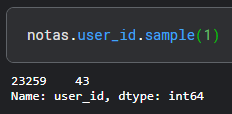

In [26]:
usuario_43 = notas.query('user_id == 43')
usuario_43[['item_id', 'rating']].set_index('item_id')

,rating
item_id,
14,2
137,4
323,3
815,4
120,4
...,...
254,3
202,5
892,3


In [27]:
def historico_usuario(usuario):
    historico_usuario = notas.query('user_id == %d' % usuario)
    historico_usuario = historico_usuario[['item_id', 'rating']].set_index('item_id')
    return historico_usuario

historico_usuario(43)

,rating
item_id,
14,2
137,4
323,3
815,4
120,4
...,...
254,3
202,5
892,3


Escolhendo outro usuário:

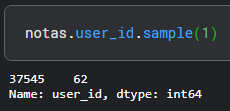

In [28]:
historico_usuario(62)

,rating
item_id,
257,2
498,4
382,3
21,3
65,4
...,...
15,2
215,3
151,5


In [29]:
user43 = historico_usuario(43)
user62 = historico_usuario(62)

In [30]:
# Unindo as avaliações dos dois usuários e deixando no dataframe somente os filmes que ambos têm em comum:

user43.join(user62, lsuffix = '_do_user', rsuffix = '_comparacao').dropna()

,rating_do_user,rating_comparacao
item_id,,
14,2,4.0
815,4,3.0
204,4,3.0
151,4,5.0
64,5,4.0
...,...,...
421,3,5.0
127,4,4.0
845,5,3.0


In [31]:
diferenca = user43.join(user62, lsuffix = '_do_user', rsuffix = '_comparacao').dropna()

np.linalg.norm(diferenca['rating_do_user'] - diferenca['rating_comparacao'])

13.564659966250536

Diante este valor, ainda não é possível dizer se os perfis são compatíveis, ou não. Porém vou fazer uma função para agilizar o cálculo entre outros usuários.

In [32]:
def distancia_entre_perfis(user_id1, user_id2):
    notas1 = historico_usuario(user_id1)
    notas2 = historico_usuario(user_id2)
    diferenca = notas1.join(notas2, lsuffix = '_do_user', rsuffix = '_comparacao').dropna()
    distancia = np.linalg.norm(diferenca['rating_do_user'] - diferenca['rating_comparacao'])
    return [user_id1, user_id2, distancia]

In [33]:
distancia_entre_perfis(43, 62)

[43, 62, 13.564659966250536]

## Verificando quais são os perfis com maior compatibilidade:

In [34]:
notas.user_id.unique()

array([196, 186,  22, 244, 166, 298, 115, 253, 305,   6,  62, 286, 200,
       210, 224, 303, 122, 194, 291, 234, 119, 167, 299, 308,  95,  38,
       102,  63, 160,  50, 301, 225, 290,  97, 157, 181, 278, 276,   7,
        10, 284, 201, 287, 246, 242, 249,  99, 178, 251,  81, 260,  25,
        59,  72,  87,  42, 292,  20,  13, 138,  60,  57, 223, 189, 243,
        92, 241, 254, 293, 127, 222, 267,  11,   8, 162, 279, 145,  28,
       135,  32,  90, 216, 250, 271, 265, 198, 168, 110,  58, 237,  94,
       128,  44, 264,  41,  82, 262, 174,  43,  84, 269, 259,  85, 213,
       121,  49, 155,  68, 172,  19, 268,   5,  80,  66,  18,  26, 130,
       256,   1,  56,  15, 207, 232,  52, 161, 148, 125,  83, 272, 151,
        54,  16,  91, 294, 229,  36,  70,  14, 295, 233, 214, 192, 100,
       307, 297, 193, 113, 275, 219, 218, 123, 158, 302,  23, 296,  33,
       154,  77, 270, 187, 170, 101, 184, 112, 133, 215,  69, 104, 240,
       144, 191,  61, 142, 177, 203,  21, 197, 134, 180, 236, 26

In [35]:
print('O dataset possui %d usuarios.' % len(notas.user_id.unique()))

O dataset possui 943 usuarios.


No dataframe das avaliações, no total há 943 usuários. Portanto, vou comparar as avaliações do perfil 43 com outros 5 usuários:

In [36]:
usuario_1 = 43

distancias = []
for usuario in notas['user_id'].unique():
    calculo = distancia_entre_perfis(usuario_1, usuario)
    distancias.append(calculo)

distancias[:5]

[[43, 196, 5.916079783099616],
 [43, 186, 10.295630140987],
 [43, 22, 10.392304845413264],
 [43, 244, 13.638181696985855],
 [43, 166, 5.291502622129181]]

O resultado da comparação mostrou que a distância entre o usuário 43, com os demais, pode ser menor.

In [37]:
# Função para calcular a distância entre 1 usuário específico e os demais:

def distancia_entre_usuarios(usuario_1):
    todos_os_usuarios = notas['user_id'].unique()
    distancias = [distancia_entre_perfis(usuario_1, user_id) for user_id in todos_os_usuarios]
    distancias = pd.DataFrame(distancias, columns = ['Usuario_1', 'Outro_user', 'Distancia'])
    return distancias

distancia_entre_usuarios(43).head()

,Usuario_1,Outro_user,Distancia
0,43,196,5.916080
1,43,186,10.295630
2,43,22,10.392305
3,43,244,13.638182
4,43,166,5.291503


In [38]:
# Ordenando o Dataframe pela Distância:

def mais_proximos_de(usuario_1):
    distancias = distancia_entre_usuarios(usuario_1)
    distancias = distancias.sort_values('Distancia')
    distancias = distancias.set_index('Outro_user').drop(usuario_1)
    return distancias

mais_proximos_de(43)

,Usuario_1,Distancia
Outro_user,,
172,43,1.000000
355,43,1.414214
565,43,1.732051
613,43,1.732051
427,43,1.732051
...,...,...
655,43,19.442222
537,43,19.849433
774,43,20.149442


O retorno da função mostra que o usuário 43 tem um perfil mais parecido com o usuário 172, enquanto é distante do usuário 405.

In [39]:
mais_proximos_de(43).head(20)

,Usuario_1,Distancia
Outro_user,,
172,43,1.000000
355,43,1.414214
565,43,1.732051
613,43,1.732051
427,43,1.732051
317,43,2.000000
375,43,2.000000
808,43,2.000000
309,43,2.000000


# Gerando recomendação com KNN:

KNN significa *K-nearest neighbors*, que traduzindo é *K-vizinhos mais próximos*. Este método é parecido com o que foi feito até agora, quando buscamos os perfis de usuários que fossem mais próximos, através dos filmes que eles assistiram e notas que atribuíram.

Nesta fase, reformulei algumas funções. Por exemplo, a função **distancia_entre_perfis** recebeu um novo argumento, caso a quantidade de filmes que ambos assistiram for menor do que 5, a distância entre estes perfis não é calculada. Na função **distancia_entre_usuarios**, o novo argumento determina a quantidade máxima de perfis que se quer comparar. Já na função **mais_proximos_de**, adicionei os 2 argumentos citados anteriormente.

In [40]:
def distancia_entre_perfis(user_id1, user_id2, minimo = 5):
    notas1 = historico_usuario(user_id1)
    notas2 = historico_usuario(user_id2)
    diferenca = notas1.join(notas2, lsuffix = '_do_user', rsuffix = '_comparacao').dropna()
    
    if(len(diferenca) < minimo):
        return None
    
    distancia = np.linalg.norm(diferenca['rating_do_user'] - diferenca['rating_comparacao'])
    return [user_id1, user_id2, distancia]

In [41]:
def distancia_entre_usuarios(user_1, numero_maximo_de_analise = None):
    todos_os_usuarios = notas['user_id'].unique()
    
    if numero_maximo_de_analise:
        todos_os_usuarios = todos_os_usuarios[:numero_maximo_de_analise]
        
    distancias = [distancia_entre_perfis(user_1, user_id) for user_id in todos_os_usuarios]
    distancias = list(filter(None, distancias))
    distancias = pd.DataFrame(distancias, columns = ['Usuario_1', 'Outro_user', 'Distancia'])
    return distancias

In [42]:
def mais_proximos_de(user_1, quantidade_user_proximos = 10, numero_maximo_de_analise = None):
    distancias = distancia_entre_usuarios(user_1, numero_maximo_de_analise = numero_maximo_de_analise)
    distancias = distancias.sort_values('Distancia')
    distancias = distancias.set_index('Outro_user').drop(user_1)
    return distancias.head(quantidade_user_proximos)

In [43]:
mais_proximos_de(196, numero_maximo_de_analise = 50)

,Usuario_1,Distancia
Outro_user,,
251,196,1.732051
97,196,2.236068
81,196,2.449490
157,196,2.645751
287,196,3.162278
160,196,3.162278
298,196,3.162278
119,196,3.162278
290,196,3.316625


Ao testar a última função, vemos que os 10 perfis (dentro dos 50 primeiros presentes no dataset *notas*) os que tiveram maior proximidade com o usuário 196, são os usuários 251 e 97.

---

Tendo conhecimento dos perfis mais próximos, agora é possível buscar novos filmes para o usuário.

Primeiro, criei uma nova função que possui os mesmos argumentos que a função **mais_proximos_de**, que, em resumo, retorna 5 recomendações de filmes, ao fazer uma seleção daqueles que tiveram as melhores notas nos perfis mais próximos.

In [72]:
def sugestoes(user1, quantidade_user_proximos = 10, numero_maximo_de_analise = None):
    notas_user1 = historico_usuario(user1)
    historico_filmes = notas_user1.index
    similares = mais_proximos_de(user1, quantidade_user_proximos = quantidade_user_proximos, 
                                 numero_maximo_de_analise = numero_maximo_de_analise)
    usuarios_similares = similares.index
    notas_dos_similares = notas.set_index('user_id').loc[usuarios_similares]
    recomendacoes = notas_dos_similares.groupby('item_id').mean()[['rating']]
    recomendacoes = recomendacoes.sort_values('rating', ascending = False)
    return recomendacoes.join(filmes).head()

In [73]:
sugestoes(196, quantidade_user_proximos = 2, numero_maximo_de_analise = 50)

,rating,movie_title,release_date,IMDb_URL,unknown,Action,Adventure,Animation,Children,Comedy,...,Horror,Musical,Mystery,Romance,SciFi,Thriller,War,Western,Total_de_votos,nota_media
item_id,,,,,,,,,,,,,,,,,,,,,
237,5.0,Jerry Maguire (1996),13-Dec-1996,http://us.imdb.com/M/title-exact?Jerry%20Magui...,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,384,3.710938
612,5.0,Lost Horizon (1937),01-Jan-1937,http://us.imdb.com/M/title-exact?Lost%20Horizo...,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,34,3.941176
115,5.0,"Haunted World of Edward D. Wood Jr., The (1995)",26-Apr-1996,http://us.imdb.com/Title?Haunted+World+of+Edwa...,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,15,3.733333
482,5.0,Some Like It Hot (1959),01-Jan-1959,http://us.imdb.com/M/title-exact?Some%20Like%2...,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,128,3.984375
480,5.0,North by Northwest (1959),01-Jan-1959,http://us.imdb.com/M/title-exact?North%20by%20...,0,0,0,0,0,1,...,0,0,0,0,0,1,0,0,179,4.284916


As indicações (usando apenas 2 usuários) são:
- Jerry Maguire: A Grande Virada;
- Horizonte Perdido;
- The Haunted World of Edward D. Wood Jr.;
- Quanto Mais Quente Melhor;
- Intriga Internacional.

In [46]:
sugestoes(196, numero_maximo_de_analise = 50)

,rating,movie_title,release_date,IMDb_URL,unknown,Action,Adventure,Animation,Children,Comedy,...,Horror,Musical,Mystery,Romance,SciFi,Thriller,War,Western,Total_de_votos,nota_media
item_id,,,,,,,,,,,,,,,,,,,,,
508,5.0,"People vs. Larry Flynt, The (1996)",27-Dec-1996,http://us.imdb.com/M/title-exact?People%20vs.%...,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,215,3.595349
531,5.0,Shine (1996),22-Nov-1996,http://us.imdb.com/M/title-exact?Shine%20(1996),0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,129,3.922481
115,5.0,"Haunted World of Edward D. Wood Jr., The (1995)",26-Apr-1996,http://us.imdb.com/Title?Haunted+World+of+Edwa...,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,15,3.733333
272,5.0,Good Will Hunting (1997),01-Jan-1997,http://us.imdb.com/M/title-exact?imdb-title-11...,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,198,4.262626
506,5.0,Rebel Without a Cause (1955),01-Jan-1955,http://us.imdb.com/M/title-exact?Rebel%20Witho...,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,90,3.855556


Mas ao utilizar os perfis dos 10 usuários mais próximos, temos:
- O Povo Contra Larry Flynt;
- Shine - Brilhante;
- The Haunted World of Edward D. Wood Jr.;
- Gênio Indomável;
- Juventude Transviada.

In [47]:
sugestoes(196)

,rating,movie_title,release_date,IMDb_URL,unknown,Action,Adventure,Animation,Children,Comedy,...,Horror,Musical,Mystery,Romance,SciFi,Thriller,War,Western,Total_de_votos,nota_media
item_id,,,,,,,,,,,,,,,,,,,,,
185,5.0,Psycho (1960),01-Jan-1960,http://us.imdb.com/M/title-exact?Psycho%20(1960),0,0,0,0,0,0,...,1,0,0,1,0,1,0,0,239,4.100418
135,5.0,2001: A Space Odyssey (1968),01-Jan-1968,http://us.imdb.com/M/title-exact?2001:%20A%20S...,0,0,0,0,0,0,...,0,0,1,0,1,1,0,0,259,3.969112
582,5.0,"Piano, The (1993)",01-Jan-1993,"http://us.imdb.com/M/title-exact?Piano,%20The%...",0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,168,3.601190
583,5.0,Romeo Is Bleeding (1993),01-Jan-1993,http://us.imdb.com/M/title-exact?Romeo%20Is%20...,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,37,3.000000
488,5.0,Sunset Blvd. (1950),01-Jan-1950,http://us.imdb.com/M/title-exact?Sunset%20Boul...,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,65,4.200000


E quando não definimos um número máximo de usuários para análise, temos:
- Psicose;
- 2001 - Uma Odisseia no Espaço;
- O Piano;
- O Sangue de Romeo;
- Crepúsculo dos Deuses.

# Gerando recomendação para um novo usuário:

Agora, digamos que tenho um novo usuário e seus filmes são:

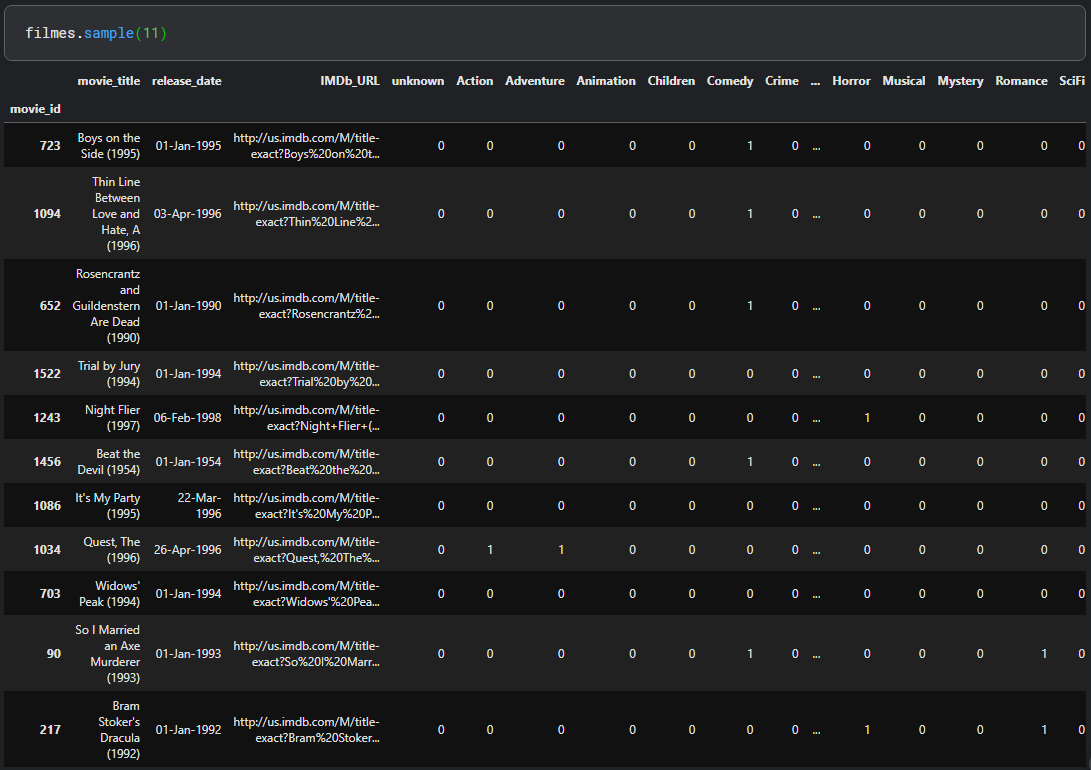

E para adicioná-lo ao nosso sistema, fiz uma função que irá atribuir um número de ID e registrar os filmes e as notas. Escolhi as notas deste novo usuário de forma randômica:

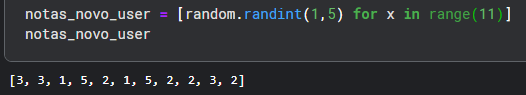

In [58]:
def novo_usuario(seus_filmes):
    novo_usuario = notas['user_id'].max()+1
    notas_do_usuario_novo = pd.DataFrame(seus_filmes, columns = ['item_id', 'rating'])
    notas_do_usuario_novo['user_id'] = novo_usuario
    return pd.concat([notas, notas_do_usuario_novo])

In [64]:
notas = novo_usuario([[723, 3], [1094, 3], [652, 1], [1522, 5], [1243, 2], [1456, 1], [1086, 5], [1034, 2], [703, 2], [90, 3], [217, 2]])
notas.tail(12)

,user_id,item_id,rating,timestamp
99999,12,203,3,879959583.0
0,944,723,3,NaN
1,944,1094,3,NaN
2,944,652,1,NaN
3,944,1522,5,NaN
4,944,1243,2,NaN
5,944,1456,1,NaN
6,944,1086,5,NaN
7,944,1034,2,NaN
8,944,703,2,NaN


In [65]:
# Para o novo usuário temos as seguintes recomendações:

sugestoes(944)

,rating,movie_title,release_date,IMDb_URL,unknown,Action,Adventure,Animation,Children,Comedy,...,Horror,Musical,Mystery,Romance,SciFi,Thriller,War,Western,Total_de_votos,nota_media
item_id,,,,,,,,,,,,,,,,,,,,,
506,5.0,Rebel Without a Cause (1955),01-Jan-1955,http://us.imdb.com/M/title-exact?Rebel%20Witho...,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,90,3.855556
64,5.0,"Shawshank Redemption, The (1994)",01-Jan-1994,http://us.imdb.com/M/title-exact?Shawshank%20R...,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,283,4.445230
475,5.0,Trainspotting (1996),19-Jul-1996,http://us.imdb.com/Title?Trainspotting+(1996),0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,250,3.884000
156,5.0,Reservoir Dogs (1992),01-Jan-1992,http://us.imdb.com/M/title-exact?Reservoir%20D...,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,148,3.986486
50,5.0,Star Wars (1977),01-Jan-1977,http://us.imdb.com/M/title-exact?Star%20Wars%2...,0,1,1,0,0,0,...,0,0,0,1,1,0,1,0,583,4.358491


- Juventude Transviada;
- Um Sonho de Liberdade;
- Trainspotting - Sem Limites;
- Cães de Aluguel;
- Star Wars: Episódio IV – Uma Nova Esperança.